In [3]:
import numpy as np
from scipy.stats import beta

# Parâmetros para dívidas vencidas
debts = [
    {"saldo": 1000, "rec_mu": 0.4, "rec_sigma": 0.1, "correcao": 0.05},  # Dívida 1
    {"saldo": 2000, "rec_mu": 0.3, "rec_sigma": 0.15, "correcao": 0.07}, # Dívida 2
    {"saldo": 500, "rec_mu": 0.5, "rec_sigma": 0.2, "correcao": 0.03},   # Dívida 3
]

simulations = 1000  # Número de simulações
max_years = 10  # Período máximo de análise (horizonte)

# Função para calcular alpha e beta da distribuição Beta
def beta_params(mean, var):
    alpha = mean * ((mean * (1 - mean) / var) - 1)
    beta = (1 - mean) * ((mean * (1 - mean) / var) - 1)
    return alpha, beta

# Simulação Monte Carlo
all_recoveries = np.zeros((simulations, max_years))  # Recuperações anuais
all_remaining_balances = np.zeros((simulations, max_years))  # Saldos anuais

for sim in range(simulations):
    annual_recoveries = np.zeros(max_years)  # Recuperações da simulação
    annual_balances = np.zeros(max_years)  # Saldos da simulação
    
    for debt in debts:
        # Parâmetros da dívida
        saldo = debt["saldo"]
        rec_mu, rec_sigma = debt["rec_mu"], debt["rec_sigma"]
        correcao = debt["correcao"]
        
        # Calcular parâmetros da distribuição Beta
        alpha, beta_param = beta_params(rec_mu, rec_sigma**2)
        
        for t in range(max_years):
            # Gerar recuperação anual
            rec_percent = beta.rvs(alpha, beta_param)
            recovery = saldo * rec_percent
            
            # Atualizar recuperação e saldo
            annual_recoveries[t] += recovery
            saldo = saldo * (1 + correcao) - recovery
            saldo = max(saldo, 0)  # O saldo não pode ser negativo
            
            # Armazenar saldo restante
            annual_balances[t] += saldo
    
    all_recoveries[sim] = annual_recoveries
    all_remaining_balances[sim] = annual_balances

# Cálculo de métricas de risco
expected_recoveries = np.mean(all_recoveries, axis=0)  # Recuperação esperada por ano
expected_balances = np.mean(all_remaining_balances, axis=0)  # Saldos esperados por ano

#Calcula valor presente das recuperações esperadas
expected_recoveries_pv = np.zeros(max_years)
tx_desconto = .06
for i in range(max_years):
    expected_recoveries_pv[i] = expected_recoveries[i] / ((1 + tx_desconto) ** i)
npv = np.sum(expected_recoveries_pv)


#Printar resultados
print("Recuperação esperada por ano:")
for i, rec in enumerate(expected_recoveries):
    print(f"Ano {i+1}: R$ {rec:.2f}")

print("\nSaldo esperado por ano:")
for i, bal in enumerate(expected_balances):
    print(f"Ano {i+1}: R$ {bal:.2f}")

print("\nValor presente das recuperações esperadas:")
print(f"NPV: R$ {npv:.2f}")


Recuperação esperada por ano:
Ano 1: R$ 1244.96
Ano 2: R$ 855.76
Ano 3: R$ 583.78
Ano 4: R$ 424.12
Ano 5: R$ 305.51
Ano 6: R$ 219.53
Ano 7: R$ 162.76
Ano 8: R$ 125.33
Ano 9: R$ 91.68
Ano 10: R$ 66.96

Saldo esperado por ano:
Ano 1: R$ 2460.04
Ano 2: R$ 1753.07
Ano 3: R$ 1278.01
Ano 4: R$ 934.89
Ano 5: R$ 689.72
Ano 6: R$ 515.30
Ano 7: R$ 386.65
Ano 8: R$ 287.17
Ano 9: R$ 214.83
Ano 10: R$ 162.43

Valor presente das recuperações esperadas:
NPV: R$ 3629.24


C:\Users\d805664\AppData\Local\Temp\ipykernel_17104\3226999546.py:3: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn')


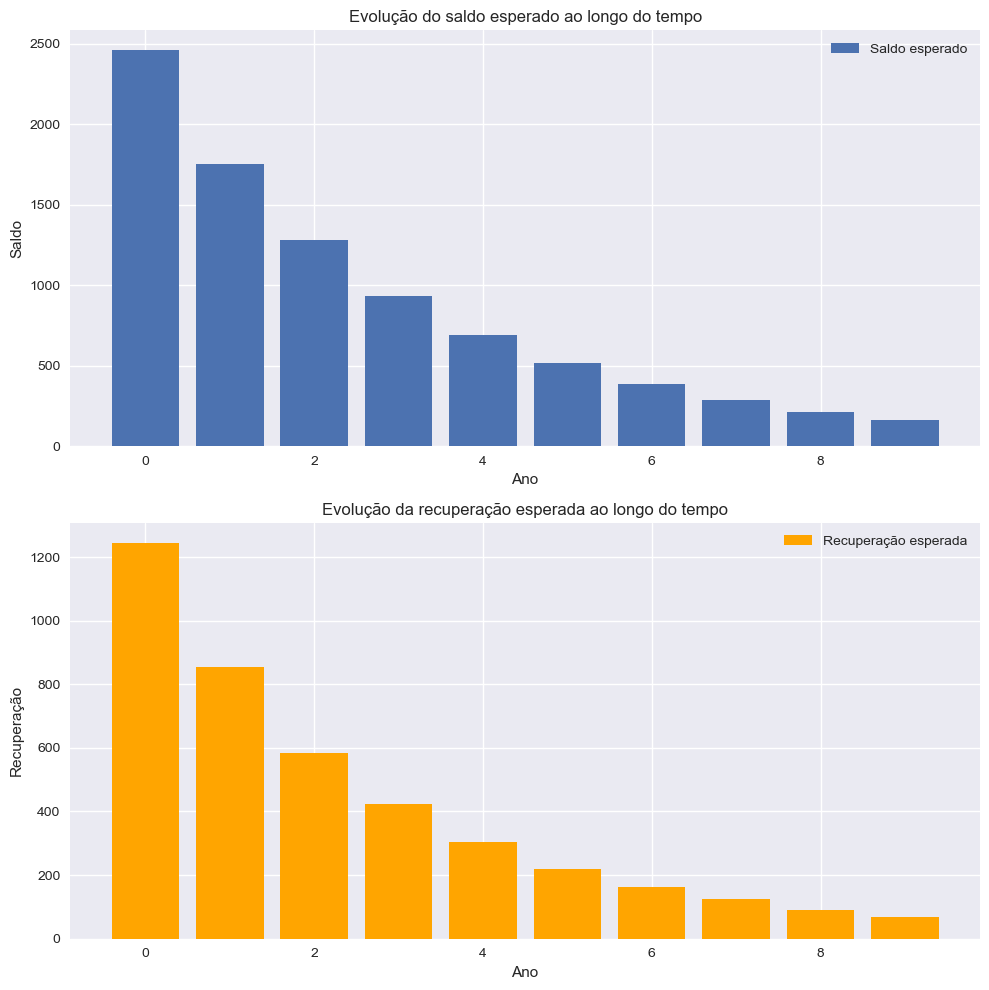

In [11]:
#Criar um plot com dois subplots para mostrar a evolução do saldo e das recuperações esperadas ao longo do tempo, usando um estilo elegante
import matplotlib.pyplot as plt
plt.style.use('seaborn')

fig, ax = plt.subplots(2, 1, figsize=(10, 10))

# Plotar saldos esperados em gráfico de barras
ax[0].bar(range(max_years),expected_balances, label="Saldo esperado")
ax[0].set_title("Evolução do saldo esperado ao longo do tempo")
ax[0].set_xlabel("Ano")
ax[0].set_ylabel("Saldo")
ax[0].legend()

# Plotar recuperações esperadas
ax[1].bar(range(max_years), expected_recoveries, label="Recuperação esperada", color = "orange")
ax[1].set_title("Evolução da recuperação esperada ao longo do tempo")
ax[1].set_xlabel("Ano")
ax[1].set_ylabel("Recuperação")
ax[1].legend()

plt.tight_layout()
plt.show()